# Wuzzaf Scrapping Data for ITs jobs Full pages

## import libraries

In [479]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import csv
import pandas as pd 
from pandas import DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
x=list(range(131))
limit=2600
keys=0
urls=[]
for i in x:
    key=keys
    y = str(key)
    url='https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start='+y
    urls.append(url)
    #print(urls)
    #print(url)
    keys+=20
    if key==limit:
        break
#print(urls[2])

In [4]:
f= open("ًwuzzaf10_8_2021.csv","w",encoding='utf-8')
header = "wow\n"
f.write(header) 
for url in urls:
    print(url)    
    client=urlopen(url)
    html= client.read()
    client.close()
    soup = bs(html,"html.parser")
    containers = soup.find_all("div",{"class":"result-wrp row"}) 
    for container in containers:
    
        job_job = container.findAll("h2",{"class":"job-title"})
        job_title = job_job[0].text.strip()    
        
        company_name = container.findAll("span",{"class":"company-name"})
        company_names = company_name[0].text.strip()     
                
        job_type = container.findAll("div",{"class":"job-details"})
        job_description = job_type[0].text.strip()
        job_description = ' '.join(job_description.split())
        
        company_location=container.findAll("span",{"class":"location location-desktop"})
        company_locations = company_location[0].text.strip() 
        
        f.write(job_title + "%" + company_names + "%" + company_locations + "%" + job_description + "\n")    
        
f.close()

https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=0
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=20
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=40
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=60
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=80
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=100
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=120
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=140
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=160
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=180
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=200
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=220
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=240
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=260
https://wuzzuf.net/a/IT-Software-Develop

In [490]:
import pandas as pd 
df21 = pd.read_csv("ًwuzzaf10_8_2021.csv", sep='delimiter')

<ipython-input-490-b65a65447a05>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df21 = pd.read_csv("ًwuzzaf10_8_2021.csv", sep='delimiter')


In [491]:
# check columns name
df21.columns

Index(['wow'], dtype='object')

In [492]:
# check data
df21

,wow
0,Business Development Specialist - Upper Egypt%...
1,Senior/Intermediate .NET Core Developer (Remot...
2,Senior Software Developer%Bnsights%- New Cairo...
3,Software Developer / Desktop Development%ITS%-...
4,Senior Software Developer -Dynamics 365...%Cro...
...,...
2615,Robotics Teacher/Co-Teacher - Kids%Robokids%- ...
2616,Fixed Shift- English Technical Support Agent%S...
2617,"Storage, Backup and Virtualization Consultant%..."
2618,"XD Designer%RMG%- New Cairo, Cairo%Part Time Â..."


In [493]:
# split the data with the symbol we have created before
df21 = df21['wow'].str.split('%',expand = True)

In [494]:
# check data again
df21

,0,1,2,3
0,Business Development Specialist - Upper Egypt,golden,"- Aswan, Egypt",Full Time Â· Experienced Â· 2+ Yrs of Exp Â· B...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"- Cairo, Egypt",Full Time Â· Experienced Â· 4+ Yrs of Exp Â· S...
2,Senior Software Developer,Bnsights,"- New Cairo, Cairo",Full Time Â· Experienced Â· 6-10 Yrs of Exp Â·...
3,Software Developer / Desktop Development,ITS,"- Nasr City, Cairo",Full Time Â· Entry Level Â· 0-2 Yrs of Exp Â· ...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"- New Cairo, Cairo",Full Time Â· Experienced Â· 4-12 Yrs of Exp Â·...
...,...,...,...,...
2615,Robotics Teacher/Co-Teacher - Kids,Robokids,"- New Cairo, Cairo",Part Time Â· Entry Level Â· 0-2 Yrs of Exp Â· ...
2616,Fixed Shift- English Technical Support Agent,Sykes Enterprises,"- Maadi, Cairo",Full Time Â· Entry Level Â· 1-4 Yrs of Exp Â· ...
2617,"Storage, Backup and Virtualization Consultant",Global Brands,"- New Cairo, Cairo",Full Time Â· Experienced Â· 3+ Yrs of Exp Â· C...
2618,XD Designer,RMG,"- New Cairo, Cairo",Part Time Â· Experienced Â· 5-7 Yrs of Exp Â· ...


In [495]:
df21 = df21.rename(columns={0: 'job_title'})
df21 = df21.rename(columns={1: 'company_names'})
df21 = df21.rename(columns={2: 'company_locations'})
df21 = df21.rename(columns={3: 'job_description'})

In [496]:
df21

,job_title,company_names,company_locations,job_description
0,Business Development Specialist - Upper Egypt,golden,"- Aswan, Egypt",Full Time Â· Experienced Â· 2+ Yrs of Exp Â· B...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"- Cairo, Egypt",Full Time Â· Experienced Â· 4+ Yrs of Exp Â· S...
2,Senior Software Developer,Bnsights,"- New Cairo, Cairo",Full Time Â· Experienced Â· 6-10 Yrs of Exp Â·...
3,Software Developer / Desktop Development,ITS,"- Nasr City, Cairo",Full Time Â· Entry Level Â· 0-2 Yrs of Exp Â· ...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"- New Cairo, Cairo",Full Time Â· Experienced Â· 4-12 Yrs of Exp Â·...
...,...,...,...,...
2615,Robotics Teacher/Co-Teacher - Kids,Robokids,"- New Cairo, Cairo",Part Time Â· Entry Level Â· 0-2 Yrs of Exp Â· ...
2616,Fixed Shift- English Technical Support Agent,Sykes Enterprises,"- Maadi, Cairo",Full Time Â· Entry Level Â· 1-4 Yrs of Exp Â· ...
2617,"Storage, Backup and Virtualization Consultant",Global Brands,"- New Cairo, Cairo",Full Time Â· Experienced Â· 3+ Yrs of Exp Â· C...
2618,XD Designer,RMG,"- New Cairo, Cairo",Part Time Â· Experienced Â· 5-7 Yrs of Exp Â· ...


In [497]:
df20 = pd.read_csv("wuzzaf_2020.csv")
df1416 = pd.read_csv("Wuzzuf14-16.csv")

In [498]:
df20.head()

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo"
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo"


In [499]:
df1416.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,1/1/2014 20:01,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,1/2/2014 11:01,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,1/2/2014 12:01,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000.0,8000.0,1.0,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,5684.0,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound


In [500]:
#cleaning
df21=df21.copy()
df20=df20.copy()
df1416=df1416.copy()

In [501]:
df20= df20.drop(['#PAGE_URL','job-link','job-link_link'], axis = 1)
df1416 =df1416.drop(['currency', 'views', 'post_date', 'num_vacancies', 'salary_maximum', 'salary_minimum', 'id','job_requirements','career_level'
                    ,'payment_period','job_industry1','job_industry2','job_industry3'], axis=1)

In [502]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              14732 non-null  object
 1   job_title         14731 non-null  object
 2   job_category1     14731 non-null  object
 3   job_category2     14730 non-null  object
 4   job_category3     14730 non-null  object
 5   experience_years  14730 non-null  object
 6   job_description   14540 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [503]:
df1416["description"] = df1416["experience_years"].astype(str) +' experience ' + df1416["job_description"]
#df1416["job_title"] = df1416["job_title"].astype(str) +" \ "+df1416["job_category1"] + " \ " +df1416["job_category2"]+" \ "+df1416["job_category3"]


In [504]:
df1416= df1416.drop(['experience_years','job_description','job_category1','job_category2','job_category3'], axis = 1)


In [505]:
df1416.head()

,city,job_title,description
0,NaN,NaN,NaN
1,Cairo,German Training Coordinator,0-2 experience <p>&bull;Placing jobs' ads on v...
2,Cairo,Junior Software Developer,"2 experience <span style=""text-decoration: und..."
3,Cairo,Application Support Engineer,"2-Jan experience <strong><span style=""text-dec..."
4,Alexandria,Electrical Maintenance Engineer,3-Jan experience Job Title: Electrical Mainten...


In [506]:
#renaming columns 
df21 = df21.rename(columns = {'company_names': 'company','company_locations': 'location','job_description':'description'})
df20 = df20.rename(columns = {'title':'job_title','company-name': 'company','short-description-':'description'})
df1416 = df1416.rename(columns = {'city': 'location'})

In [507]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    2620 non-null   object
 1   company      2620 non-null   object
 2   location     2620 non-null   object
 3   description  2620 non-null   object
dtypes: object(4)
memory usage: 82.0+ KB


In [508]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    2580 non-null   object
 1   company      2580 non-null   object
 2   description  2580 non-null   object
 3   location     2580 non-null   object
dtypes: object(4)
memory usage: 80.8+ KB


In [509]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14732 non-null  object
 1   job_title    14731 non-null  object
 2   description  14540 non-null  object
dtypes: object(3)
memory usage: 513.9+ KB


In [510]:
#saving datasets after cleaning
df21.to_csv("wuzzafCleaned21.csv", index = False)
df20.to_csv("wuzzafCleaned20.csv", index = False)
df1416.to_csv("wuzzafCleaned1416.csv", index = False)

In [511]:
#merging datasets
df1 = pd.read_csv('wuzzafCleaned21.csv')
df2 = pd.read_csv('wuzzafCleaned20.csv')
df3 = pd.read_csv('wuzzafCleaned1416.csv')

df_list = [df1, df2, df3]
df = pd.concat(df_list)
df

,job_title,company,location,description
0,Business Development Specialist - Upper Egypt,golden,"- Aswan, Egypt",Full Time Â· Experienced Â· 2+ Yrs of Exp Â· B...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"- Cairo, Egypt",Full Time Â· Experienced Â· 4+ Yrs of Exp Â· S...
2,Senior Software Developer,Bnsights,"- New Cairo, Cairo",Full Time Â· Experienced Â· 6-10 Yrs of Exp Â·...
3,Software Developer / Desktop Development,ITS,"- Nasr City, Cairo",Full Time Â· Entry Level Â· 0-2 Yrs of Exp Â· ...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"- New Cairo, Cairo",Full Time Â· Experienced Â· 4-12 Yrs of Exp Â·...
...,...,...,...,...
21917,Creative Designer,NaN,Cairo,4-Jan experience &bull; Create advertising cre...
21918,Health and Safety Manager - Qalyubia,NaN,Qalyubia,5+ experience Health and Safety Managers are a...
21919,NaN,NaN,NaN,NaN
21920,E Markting,NaN,Cairo,0 to 1 experience We are looking for E- market...


In [512]:
#replacing all NaNs in Company column by Hidden name
import numpy as np
df['company'].replace(' ', np.nan, inplace=True) 
df["company"].fillna("Hidden Name",inplace=True)

df

,job_title,company,location,description
0,Business Development Specialist - Upper Egypt,golden,"- Aswan, Egypt",Full Time Â· Experienced Â· 2+ Yrs of Exp Â· B...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"- Cairo, Egypt",Full Time Â· Experienced Â· 4+ Yrs of Exp Â· S...
2,Senior Software Developer,Bnsights,"- New Cairo, Cairo",Full Time Â· Experienced Â· 6-10 Yrs of Exp Â·...
3,Software Developer / Desktop Development,ITS,"- Nasr City, Cairo",Full Time Â· Entry Level Â· 0-2 Yrs of Exp Â· ...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"- New Cairo, Cairo",Full Time Â· Experienced Â· 4-12 Yrs of Exp Â·...
...,...,...,...,...
21917,Creative Designer,Hidden Name,Cairo,4-Jan experience &bull; Create advertising cre...
21918,Health and Safety Manager - Qalyubia,Hidden Name,Qalyubia,5+ experience Health and Safety Managers are a...
21919,NaN,Hidden Name,NaN,NaN
21920,E Markting,Hidden Name,Cairo,0 to 1 experience We are looking for E- market...


In [513]:
#analysis
#assessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27122 entries, 0 to 21921
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    19931 non-null  object
 1   company      27122 non-null  object
 2   location     19932 non-null  object
 3   description  19740 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [535]:
#figure out how many jobs in each title

df.job_title.value_counts()

Graphic Designer                                393
Web Developer                                   160
PHP Developer                                   138
Web Designer                                    132
Software Developer                              119
                                               ... 
Do You Wanna Make Difference As An Engineer?      1
Backend Developer (Node.Js)                       1
Principal Software Developer - VueJS              1
Project Coordinator - Translation                 1
Purchasing Supervisor (Packaging Material)        1
Name: job_title, Length: 10261, dtype: int64

In [541]:
df.job_title.describe()

count                19931
unique               10261
top       Graphic Designer
freq                   393
Name: job_title, dtype: object

In [542]:
dfnew = DataFrame (Level_list,columns=['Level'])
print (dfnew)

            Level
0     Experienced
1     Experienced
2     Experienced
3     Entry Level
4     Experienced
...           ...
5195  Experienced
5196  Experienced
5197  Experienced
5198      Manager
5199  Experienced

[5200 rows x 1 columns]


<AxesSubplot:title={'center':'Most 10 offers through 2014,2016,2020,2021 '}>

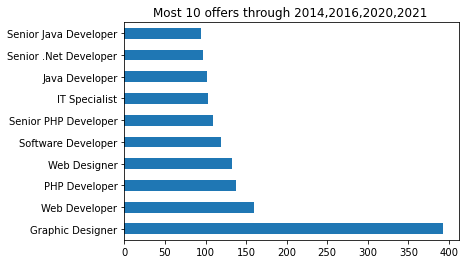

In [543]:
# Top 10 jops=
title = df['job_title'].value_counts()[:10]
title.plot(kind='barh', title='Most 10 offers through 2014,2016,2020,2021 ') 


In [544]:
#figure out how many jobs in each city
df.location.value_counts()

Cairo                   10034
Giza                     2593
Alexandria                719
- Cairo, Egypt            464
Maadi, Cairo              440
                        ...  
Sheikh Zayed City           1
ابها                        1
Dammam, Saudi Arabia        1
Alexandria or Cairo         1
El Menoufia                 1
Name: location, Length: 586, dtype: int64

<AxesSubplot:title={'center':'Geographical distribution of jobs'}>

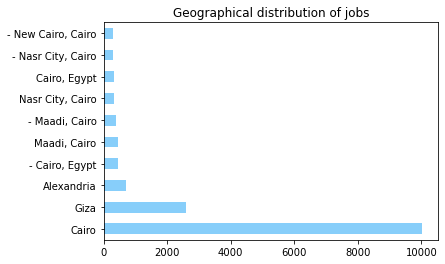

In [545]:
#top cities having job opportunities
location = df['location'].value_counts()[:10]
location.plot(kind = 'barh',color = "lightskyblue",title='Geographical distribution of jobs')

In [546]:
df.company.describe()

count           27122
unique           1620
top       Hidden Name
freq            22199
Name: company, dtype: object

<AxesSubplot:title={'center':'Most employing companies'}>

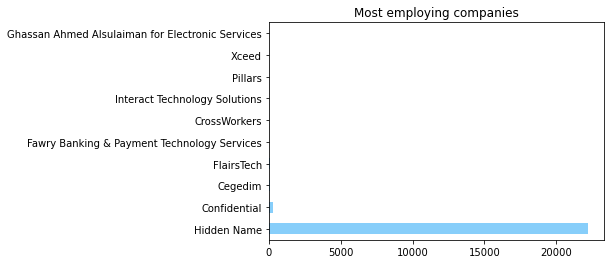

In [556]:
#best companies
company = df['company'].value_counts()[:10]
company.plot(kind = 'barh',color = "lightskyblue",title='Most employing companies')
#in conclusion most of companies hide their name

In [550]:
df.description.describe()

count                                                 19740
unique                                                17390
top       0 - 2 experience Are you a talented, dynamic s...
freq                                                     18
Name: description, dtype: object

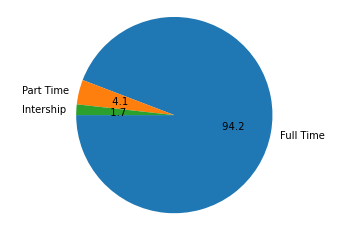

In [552]:
pieLabels = 'Full Time', 'Part Time', 'Intership'
job_typeShare = [2430/2580,105/2580,45/2580 ]
figureObject, axesObject = plt.subplots()
axesObject.pie(job_typeShare,labels=pieLabels, autopct='%5.1f',startangle=180)
axesObject.axis('equal')
plt.show()

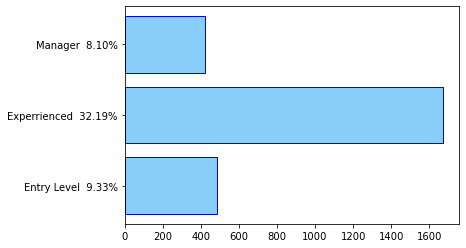

In [558]:
total = 5200
langs = ['Entry Level', 'Experrienced', 'Manager']
langs_users_num = np.array([485, 1674, 421])
percent = langs_users_num/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]
plt.barh(langs, langs_users_num, color='lightskyblue', edgecolor='blue' )
plt.yticks(range(len(langs)), new_labels)
plt.show()